# INFO 1998 Final Project
### Vaishnavi Gupta (vg222), Mansi Agarwal (ma996), Sidharth Vasudev (sv355)

First, we import our data in and drop the records that we don't need. The .csv file that we are using has over 2 million rows, so it does take about a minute to read in the csv.

In [120]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
import random
from sklearn.ensemble import RandomForestClassifier

In [122]:
messy_df=pd.read_csv('loan.csv')
for i in messy_df.columns:
    print(i)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
b

Now, we narrow down the number of columns in the dataframe according to our hypothesis. We also add a binary column, 'loan_paid', derived from 'loan_status', to determine if a loan was 'good' or 'bad'. Similarly, we also replace the 'verification_status' column with a binary indicator.
We also check to see what percentage of a column consists of null values, and if the percentage is more than 70%, we drop the column. We can see that 'mths_since_last_delinq' had too many null values, so it got dropped.
For the remaining columns, we fill in the null values with the most common value.

In [144]:
from sklearn.preprocessing import LabelEncoder
df = messy_df.filter(items=['loan_amnt','term', 'int_rate', 'installment', 'emp_title','emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'tot_hi_cred_lim', 'delinq_2yrs','addr_state','mths_since_last_delinq','last_credit_pull_d','loan_status'])
df = df.loc[(messy_df['loan_status']!='Current')]

df['verified'] = 1
df.loc[(df['verification_status']=='Not Verified'), 'verified']= 0

df = df.dropna(axis=1, thresh=int(0.80*len(df)))
df.fillna(method='ffill', inplace=True)

df['last_credit_pull'] = [int(x[-4:]) for x in df['last_credit_pull_d']]
df['term'] = [int(x[:3]) for x in df['term']]

df['loan_paid'] = 1
df.loc[(df['loan_status']!='Fully Paid'), 'loan_paid']= 0

df = df.drop(columns=['verification_status', 'loan_status', 'last_credit_pull_d'])

#converting categorical string data to numerical data
enc = LabelEncoder()
for i in df.columns:
    df[i] = enc.fit_transform(df[i])

df.tail(30)

,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,tot_hi_cred_lim,delinq_2yrs,addr_state,verified,last_credit_pull,loan_paid
2260598,781,0,666,69845,157737,0,4,26709,76322,0,19,1,11,0
2260599,371,0,635,32728,324176,5,5,9662,48889,0,44,0,11,1
2260607,248,0,627,20878,74535,5,5,5234,812,0,36,1,11,1
2260609,1409,1,662,81144,232909,1,1,53352,89930,0,48,1,12,0
2260614,259,0,406,18899,306007,4,5,9015,75163,0,43,0,12,0
2260616,771,1,664,54780,181783,5,5,32560,15635,0,4,1,11,1
2260618,811,0,477,63466,339898,1,1,42904,54571,0,4,0,11,1
2260619,611,0,506,49756,252907,6,5,30460,43394,0,23,1,12,0
2260620,435,0,406,33611,341066,8,5,19976,33726,0,34,0,12,0
2260624,691,0,406,53759,353753,9,5,22761,9842,0,34,1,12,1


Now, we'd like to see if any of the factors that we've selected are highly correlated to each other. In that case, we'd like to keep only one of the factors to prevent skewing the model. To see the correlations between all the features, we can make a heatmap. As we can see below, installment and loan amount are highly correlated, so it doesn't make sense to use both. Also, employment length shows a very weak correlation with 'loan_paid', so we can drop it.

(1340973, 14)


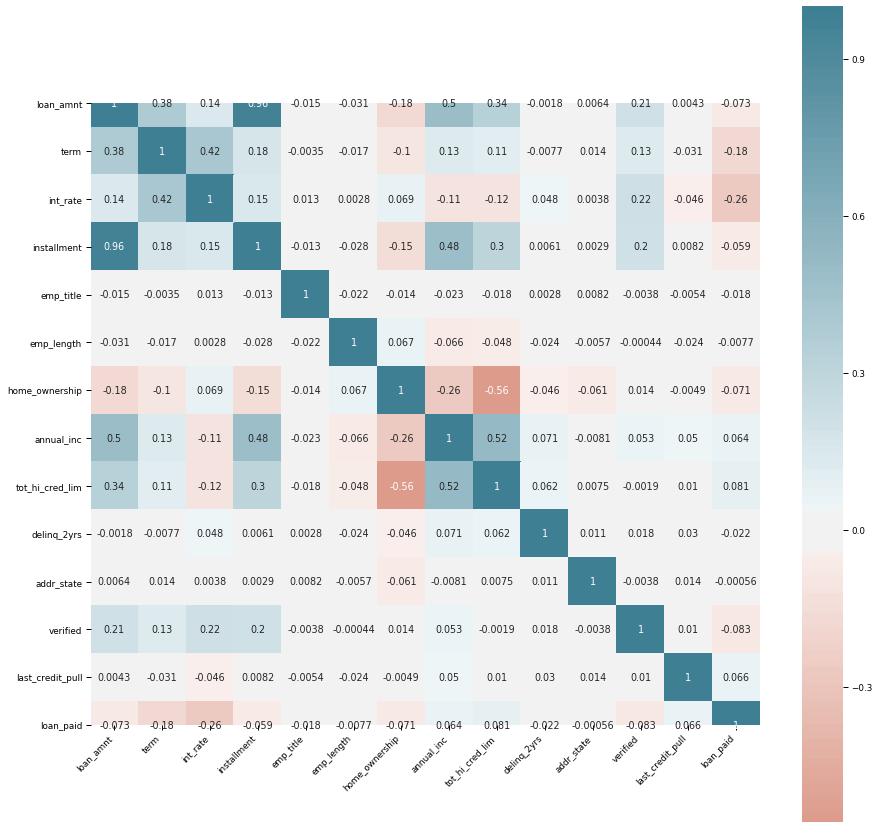

In [145]:
import seaborn as sns
print(df.shape)
plt.figure(figsize=(15,15))
#corr = df.corr()
corr = df.assign(emp_title=df.emp_title.astype('category').cat.codes,
                 emp_length=df.emp_length.astype('category').cat.codes,
                 home_ownership=df.home_ownership.astype('category').cat.codes).corr()
ax = sns.heatmap(
    corr,  center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,
    xticklabels=1, yticklabels=1
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [146]:
df = df.drop(columns=['installment', 'emp_length', 'addr_state'])
X=df.drop(['loan_paid'], axis=1)
Y=df['loan_paid']

Now that we have selected our features, we try to use a Random Forest classifier. Right now, the accuracy while identifying negatives is pretty low. I would like to use k-fold validation and bagging to fix that.

In [158]:
from sklearn.metrics import confusion_matrix

#Randomize order of training elements for each tree
def rand_sample(size):
    indices = []
    for i in range(size):
        indices.append(random.randint(0,size-1))
    return indices

#Load the whole dataset into X_train and Y_train and initialize a variable tree_preds to contain each tree's prediction
# X_train = X
# Y_train = Y
# tree_preds = []
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)
# rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, bootstrap = True)
rf = RandomForestClassifier(n_estimators=2000,random_state = 42, 
                               bootstrap = True, max_depth = 10)
# Fit on training data
model.fit(X_train, Y_train)
rf_pred_train = model.predict(X_train)
rf_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, rf_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, rf_pred_test))

tn, fp, fn, tp = confusion_matrix(Y_test, rf_pred_test, labels=[False,True]).ravel()
print (fp)
print (fn)
print (tp)
print (tn)
print(tp / (tp + fn))
print(tn / (tn + fp))


Train Accuracy:  0.7843474733253193
Test Accuracy:  0.78391229061861
131576
13308
507688
17915
0.974456617709157
0.11983999036731308
